In [1]:
# Import necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf

In [2]:
# Initialize constants
INIT_LR = 1e-4
EPOCHS = 10
BS = 32  # Batch size

In [3]:
# Constants
INIT_LR = 1e-4
EPOCHS = 10
BS = 32
IMG_SIZE = 224  # Target image size for MobileNetV2
DIRECTORY = r"C:\Users\ragus\SPOON_detection_yolov3\dataset"
CATEGORIES = ["spoon", "fork"]

In [4]:
# Load and preprocess images
data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        image = img_to_array(image)
        data.append(image)
        labels.append(CATEGORIES.index(category))

In [5]:
# Convert lists to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [6]:
# Split data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [7]:
# Data augmentation for training set
trainAug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

valAug = ImageDataGenerator(rescale=1./255)

In [8]:
# Load MobileNetV2 as base model without top layers
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

C:\Users\ragus\AppData\Local\Temp\ipykernel_1640\3163076667.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))


In [9]:
# Construct the head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(CATEGORIES), activation="softmax")(headModel)

In [10]:
# Combine base and head models
model = Model(inputs=baseModel.input, outputs=headModel)

In [11]:
# Freeze base layers
for layer in baseModel.layers:
    layer.trainable = False

In [12]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=INIT_LR), metrics=["accuracy"])

In [13]:
# Train the model
H = model.fit(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=valAug.flow(testX, testY, batch_size=BS),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

Epoch 1/10


C:\Users\ragus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 700ms/step - accuracy: 0.6286 - loss: 0.6480 - val_accuracy: 0.8438 - val_loss: 0.4592
Epoch 2/10
 1/11 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - accuracy: 0.8125 - loss: 0.4909

C:\Users\ragus\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8125 - loss: 0.4909 - val_accuracy: 0.8387 - val_loss: 0.4193
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 612ms/step - accuracy: 0.7312 - loss: 0.5121 - val_accuracy: 0.9375 - val_loss: 0.3269
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8125 - loss: 0.3458 - val_accuracy: 0.8710 - val_loss: 0.3264
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 616ms/step - accuracy: 0.7989 - loss: 0.3743 - val_accuracy: 0.8906 - val_loss: 0.2589
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9200 - loss: 0.2330 - val_accuracy: 0.9032 - val_loss: 0.2825
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 603ms/step - accuracy: 0.8996 - loss: 0.2576 - val_accuracy: 0.9219 - val_loss: 0.2378
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9375 - loss: 0.1715 - val_accuracy: 0.9355 - val_loss: 0.1897
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 611ms/step - accuracy: 0.9323 - loss: 0.2020 - val_accuracy: 0.9219 - val_loss

In [14]:
# Evaluate the model
print("[INFO] Evaluating the model...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] Evaluating the model...
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 814ms/step


In [15]:
# Print classification report
#print(classification_report(testY, predIdxs, target_names=CATEGORIES))

In [16]:
# Save the model
print("[INFO] Saving the model...")
model.save("spoon_not_spoon_detector.h5")

[INFO] Saving the model...


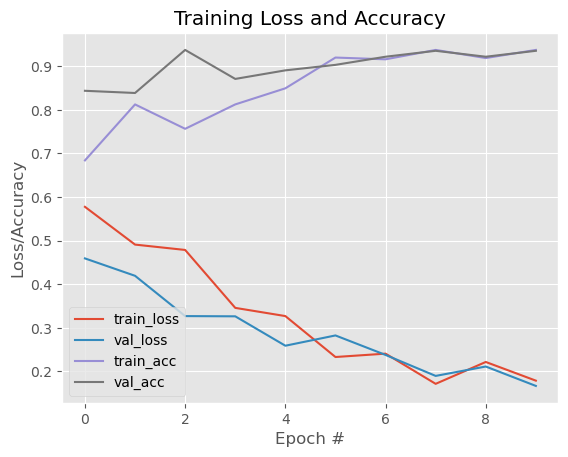

In [17]:
# Plot training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")